---
# **振動情報処理特論　第2回レポート**
## **2次のバターワース型デジタルローパスフィルタの周波数応答**
---

### 1. 伝達関数を求め周波数特性を複素数平面にプロット

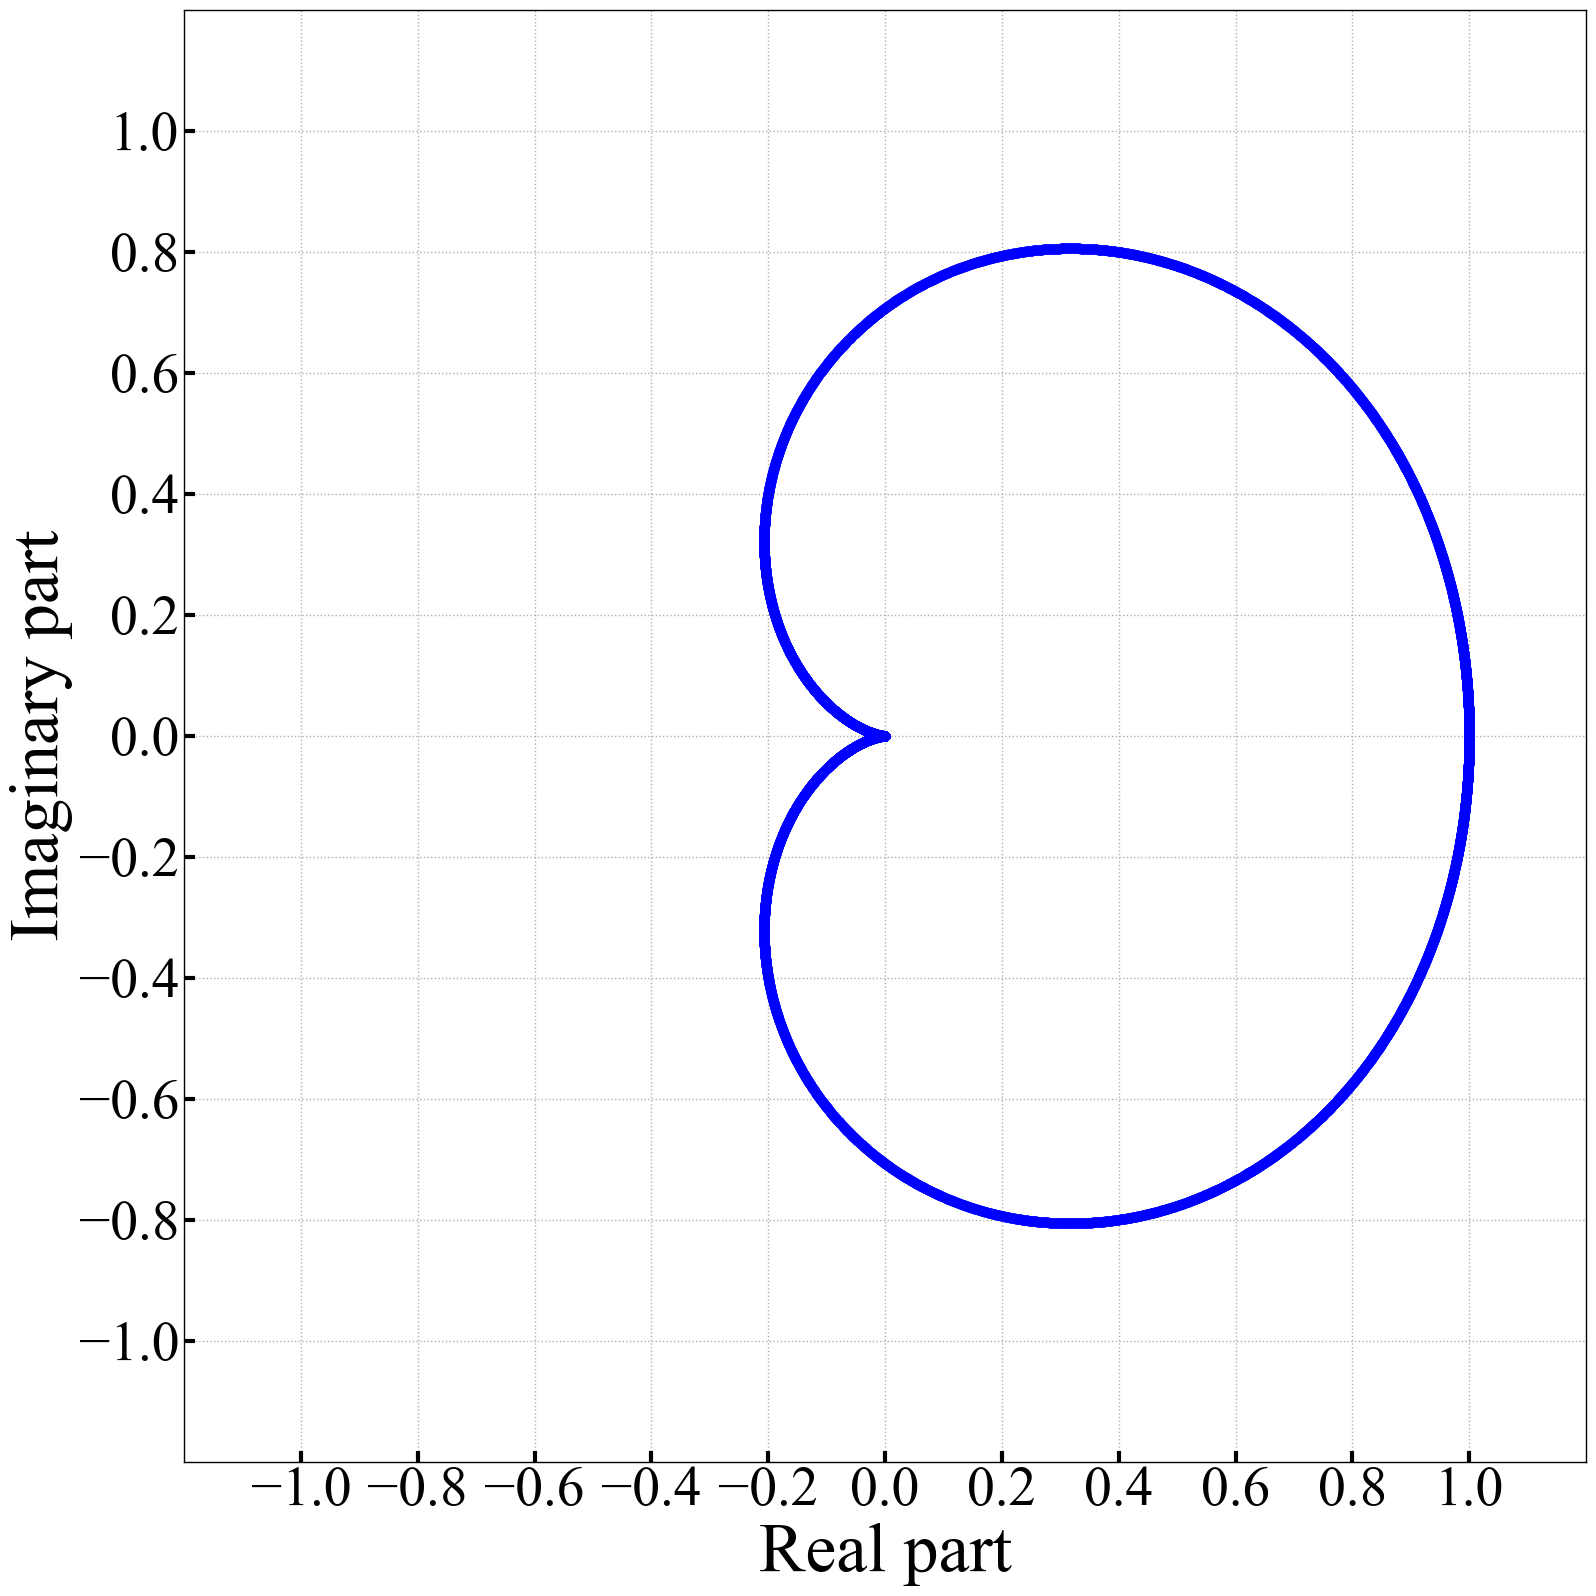

In [9]:
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib import rcParams

# Configure figure infomation
params = {
    'figure.autolayout':True,                    # Auto layout
    'font.family':'Times New Roman',#'Arial',    # Font setting
    'pdf.fonttype':42,                           # PDF font type
    'axes.linewidth':1.0,                        # Linewidth of axes
    'patch.linewidth':1.0,                       # Linewidth of legend
    'grid.linewidth':1.0,                        # Linewidth of grid
    'axes.labelsize':50,                         # Font size of axes label
    'font.size':8,                               # Text size　　　　　　
    'legend.fontsize':70,                        # Font size of legend
    'xtick.labelsize':40,                        # Font size of values in x axes
    'ytick.labelsize':40,                        # Font size of values in x axes
    'text.usetex':False,                         # For TeX font -> True
    'figure.figsize':[16, 16]#[8/2.54, 6/2.54]    # Output size (inch order)
}
rcParams.update(params)


# Calculation of Butterworth filter coefficients
PI = math.pi
CUTOFF_FREQ = 250
SAMP = 0.001
omega_0 = 2.0 * PI * CUTOFF_FREQ * SAMP
alpha = math.sin(omega_0) / math.sqrt(2.0)

param_A = [0.0] * 3  
param_A[0] = (1.0 - math.cos(omega_0)) / 2.0
param_A[1] = 1.0 - math.cos(omega_0)
param_A[2] = (1.0 - math.cos(omega_0)) / 2.0

param_B = [0.0] * 3  
param_B[0] = 1.0 + alpha
param_B[1] = -2.0 * math.cos(omega_0)
param_B[2] = 1.0 - alpha


# Definition of transfer function of a second-order Butterworth LPF
def transfer_function(z):
    transfer_function = (param_A[0] + param_A[1] * z**-1 + param_A[2] * z**-2) \
        / (param_B[0] + param_B[1] * z**-1 + param_B[2] * z**-2)
    return transfer_function


# Frequency response acquisition
frequency_response = []
frequencies = np.linspace(-1 / (2 * SAMP), 1 / (2 * SAMP), 10000)
for frequency in frequencies:
    omega_Ts = 2 * PI * frequency * SAMP
    frequency_response.append(transfer_function(np.exp(1j * omega_Ts)))
real_parts = [complex_num.real for complex_num in frequency_response]
imaginary_parts = [complex_num.imag for complex_num in frequency_response]
absolute_value = [abs(complex_num) for complex_num in frequency_response]


# Draw graphs on the complex plane
fig, ax = plt.subplots(1, 1)

ax.plot(real_parts, imaginary_parts, marker='o', color='blue', zorder=1, linewidth=3.0)

ax.set_xlabel('Real part', fontname="Times New Roman")
ax.set_ylabel('Imaginary part', fontname="Times New Roman")

ax.set_xticks(np.arange(-1.0, 1.2, 0.2))
ax.set_yticks(np.arange(-1.0, 1.2, 0.2))

ax.set_xlim(-1.2, 1.2)
ax.set_ylim(-1.2, 1.2)

ax.grid(linestyle='dotted', linewidth=1)
ax.set_axisbelow(True)

ax.xaxis.set_tick_params(which='major', width=3.0, direction='in', bottom=True, top=False, length=8)
ax.yaxis.set_tick_params(which='major', width=3.0, direction='in', left=True, right=False, length=8)

plt.tight_layout()
plt.show()


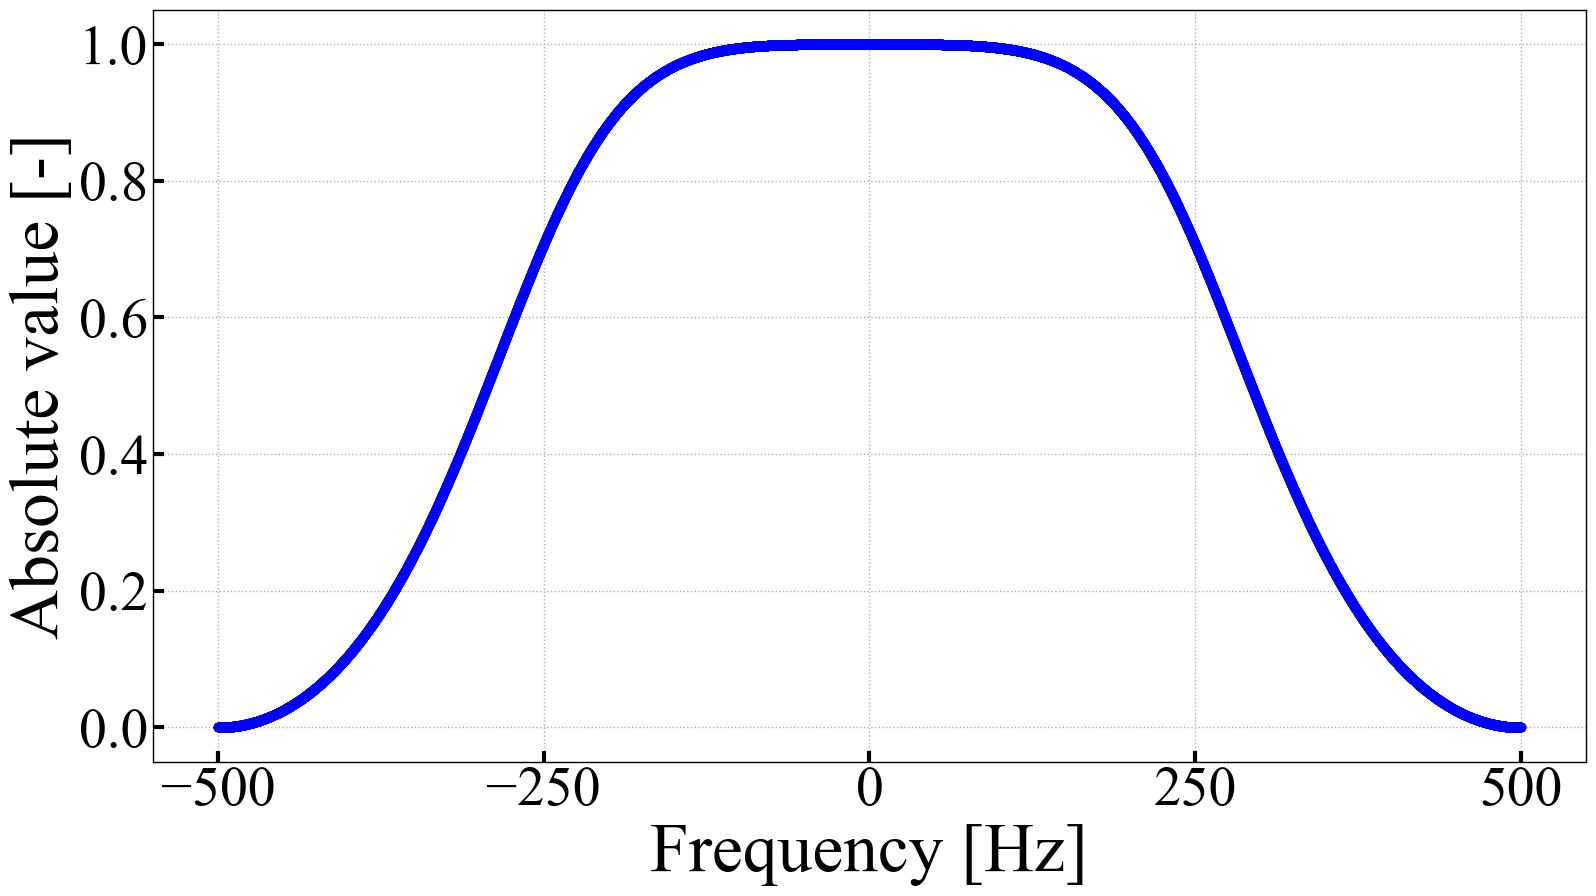

In [12]:
# Configure figure infomation
params = {
    'figure.autolayout':True,                    # Auto layout
    'font.family':'Times New Roman',#'Arial',    # Font setting
    'pdf.fonttype':42,                           # PDF font type
    'axes.linewidth':1.0,                        # Linewidth of axes
    'patch.linewidth':1.0,                       # Linewidth of legend
    'grid.linewidth':1.0,                        # Linewidth of grid
    'axes.labelsize':50,                         # Font size of axes label
    'font.size':8,                               # Text size　　　　　　
    'legend.fontsize':70,                        # Font size of legend
    'xtick.labelsize':40,                        # Font size of values in x axes
    'ytick.labelsize':40,                        # Font size of values in x axes
    'text.usetex':False,                         # For TeX font -> True
    'figure.figsize':[16, 9]#[8/2.54, 6/2.54]    # Output size (inch order)
}
rcParams.update(params)


# Draw graphs on the complex plane
fig, ax = plt.subplots(1, 1)

ax.plot(frequencies, absolute_value, marker='o', color='blue', zorder=1, linewidth=3.0)

ax.set_xlabel('Frequency [Hz]', fontname="Times New Roman")
ax.set_ylabel('Absolute value [-]', fontname="Times New Roman")

ax.set_xticks(np.arange(-500, 750, 250))
ax.set_yticks(np.arange(0.0, 1.2, 0.2))

ax.set_xlim(-550, 550)
ax.set_ylim(-0.05, 1.05)

ax.grid(linestyle='dotted', linewidth=1)
ax.set_axisbelow(True)

ax.xaxis.set_tick_params(which='major', width=3.0, direction='in', bottom=True, top=False, length=8)
ax.yaxis.set_tick_params(which='major', width=3.0, direction='in', left=True, right=False, length=8)

plt.tight_layout()
plt.show()
